## Beleg 1 - Implementierung der linearen Regression

#### Vorgehen:

1. Erstellen Sie zuerst zum Testen Ihrer Lösung automatische Daten: D.h. Punkte die auf einer Geraden liegen und deren y-Werte mittels eines gaussverteilten "Rauschen" von idealen Werten abweichen.
2. Implementieren Sie die Hypothese - lineares Modell als Python Funktion. 
3. Implementieren Sie die Kostenfunktion J als Python Funktion.
4. Plotten Sie die Kostenfunktion in der Umgebung des Minimums als Contourplot.
5. Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.
6. Plotten Sie das Modell (Fit-Gerade) zusammen mit den Daten.
7. Trainieren (siehe 5b) für verschiedene Werte der Lernrate und plotten Sie Kosten über den Iterationen in einen Graph.

### 1. Erstellung von Daten

Normalverteilung mit numpy anhand der Methode normal:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Creation of array of x and y
m = 30 #training examples
low = 0
high = 10

x = np.linspace(low, high,num=m)
y = np.linspace(low, high,num=m)
print(x)
print(y)

#x= np.array([1.,2.,3])
#y = np.array([.5, 2., 4.])

mu = 0.0
sigma = 1.5
#Introduce error
error = np.random.normal(mu, sigma, m)

#y_error = y+error
y = y+error
print(y)
#plt.hist(error, 50, edgecolor='black')
#plt.show()

[  0.           0.34482759   0.68965517   1.03448276   1.37931034
   1.72413793   2.06896552   2.4137931    2.75862069   3.10344828
   3.44827586   3.79310345   4.13793103   4.48275862   4.82758621
   5.17241379   5.51724138   5.86206897   6.20689655   6.55172414
   6.89655172   7.24137931   7.5862069    7.93103448   8.27586207
   8.62068966   8.96551724   9.31034483   9.65517241  10.        ]
[  0.           0.34482759   0.68965517   1.03448276   1.37931034
   1.72413793   2.06896552   2.4137931    2.75862069   3.10344828
   3.44827586   3.79310345   4.13793103   4.48275862   4.82758621
   5.17241379   5.51724138   5.86206897   6.20689655   6.55172414
   6.89655172   7.24137931   7.5862069    7.93103448   8.27586207
   8.62068966   8.96551724   9.31034483   9.65517241  10.        ]
[ -3.20340293e+00   5.70164620e-01   9.80092298e-01   2.86417324e+00
   6.00140873e-01   2.13095317e+00  -2.00667524e-02   3.50687549e-03
   2.40270642e+00   2.09814292e+00   3.04766165e+00   2.88312446e+00

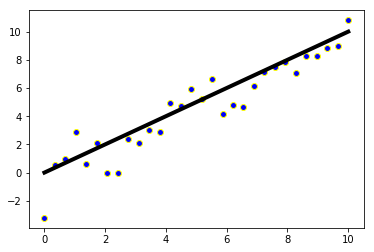

In [2]:
plt.scatter(x,y, edgecolor='yellow', color='b')
plt.plot(x, y-error, linewidth=4, color='black')
plt.show()

### 2. Hypothese implementieren - Funktion von x
Implementieren Sie die Hypothese (lineares Modell) als Python Funktion:
- linear_hypothesis(theta_0, theta_1) 
Die Pythonfunktion soll dabei eine Funktion zurückgeben: 
- hypothesis = linear_hypothesis(2., 3.) 
- print hypothesis(np.array([1., 2.]))
#[ 5.  8.]

In [3]:
#Given thetas, calculate prediction for a given x value
def linear_hypothesis(theta_0, theta_1):
    return lambda x: theta_1*x+theta_0

#Create linear function y = 3x+2
hypothesis = linear_hypothesis(2., 3.)
#Calculate linear function for x=1 and x=2
print(hypothesis(np.array([1,2,3])))


[  5.   8.  11.]


### 3. Kostenfunktion - Funktion der Parameter
def cost_function(hypothesis, x, y)...

Die Pythonfunktion soll dabei eine Funktion zurückgeben, die die beiden Parameter theta_0 und theta_1 aufnimmt.
j = cost_function(linear_hypothesis, x, y) 
print j(2.1, 2.9)
41.20  # Wert abhaengig von x und y

In [4]:
#given an hypotesis, calculate cost function
def cost_function(hypothesis,x,y, t0=0, t1=0):
    m = float(len(x)) #training examples
    
    #function for calculating 
    return lambda theta_0, theta_1: 1./(2*m)*((hypothesis(theta_0,theta_1)(x)-y)**2).sum()
    #return 1./(2*m)*((linear_hypothesis(t0,t1)(x)-y)**2).sum()

j = cost_function(linear_hypothesis, x, y)
#print(j)
print(j(2.9,2.7))


83.4013017447


### 4. Plotten der Kostenfunktion

Plotten Sie die Kostenfunktion in der Umgebung des Minimums als Contourplot.
Verwenden Sie hierzu plt.contour(X,Y,Z) und zum Erzeugen des X-Y-Oberflaechengitters meshgrid(..)

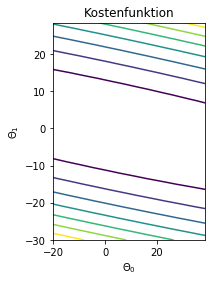

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

a = 10
b = 0
ran = 30
t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)

C = np.zeros([len(t0),len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)

T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')
plt.show()


## 5. Gradientenabstiegsverfahren

Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.

Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
theta_0, theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha)



In [6]:
#Calculates gradient for theta_0
def gradient_theta1(theta_0, theta_1, x, y):
    return lambda t1: 1./m *((linear_hypothesis(theta_0,theta_1)(x)-y)*x).sum()

In [7]:
#Calculates gradient for theta_1
def gradient_theta0(theta_0, theta_1, x, y):
    return lambda t0: 1./m *(linear_hypothesis(theta_0,theta_1)(x)-y).sum()

In [8]:
def compute_new_theta(x,y,theta_0, theta_1, alpha):
    #update theta_0
    #t0 = theta_0 - alpha*gradient_theta0(theta_0, theta_1, x,y)(theta_0)
    t0 = theta_0 - alpha*(1./m *(linear_hypothesis(theta_0,theta_1)(x)-y).sum())
    #update theta_1
    #t1 = theta_1 - alpha*gradient_theta1(theta_0, theta_1, x,y)(theta_1)
    t1 = theta_1 - alpha*(1./m *((linear_hypothesis(theta_0,theta_1)(x)-y)*x).sum())
    theta_0 = t0
    theta_1 = t1
    return theta_0, theta_1

### 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. 
Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.

In [9]:

def gradient_descent(x, y, theta_0=0, theta_1=0, alpha=0.0001):
    costs = []
    #t0 = theta_0
    #t1 = theta_1
    
    iterations = 10000
    counter = 0 
    #start cost
    j = cost_function(linear_hypothesis, x, y)(theta_0,theta_1)
    #stores costs for each iteration
    costs.append(j)
    
    #convergence value
    convergence = 0.000001 
    #costs are in each iteration updated
    #When previous cost - current cost < convergence it should stop
    #if not --> max 1000 iteration
    cprev = j + 1  
    theta0s = [theta_0]
    theta1s = [theta_1]
    
    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - j) > convergence) and (counter < iterations):
        cprev = j
        theta_0, theta_1 = compute_new_theta(x,y,theta_0, theta_1, alpha)
        
        # Store thetas
        theta0s.append(theta_0)
        theta1s.append(theta_1)
        
        # Compute the new cost
        j = cost_function(linear_hypothesis, x, y)(theta_1,theta_0)

        # Store updates
        costs.append(j)
        counter += 1   # Count

    return {'theta0': theta_0, 'theta1': theta_1, "costs": costs}

In [10]:
gr = gradient_descent(x,y)
print(gr)

{'theta0': 0.11306969203440911, 'theta1': 0.90305640819170696, 'costs': [15.598093559260384, 15.569184749029807, 15.540409527061952, 15.511767207163899, 15.483257107072188, 15.454878548428454, 15.426630856755217, 15.398513361431815, 15.3705253956705, 15.342666296492705, 15.314935404705441, 15.287332064877855, 15.259855625317964, 15.232505438049511, 15.205280858788973, 15.178181246922749, 15.151205965484465, 15.12435438113242, 15.097625864127238, 15.071019788309584, 15.044535531078084, 15.018172473367366, 14.991929999626242, 14.965807497796051, 14.939804359289106, 14.913919978967328, 14.888153755120973, 14.862505089447533, 14.836973387030758, 14.811558056319805, 14.786258509108555, 14.761074160515006, 14.736004428960886, 14.7110487361513, 14.686206507054592, 14.661477169882287, 14.636860156069174, 14.612354900253541, 14.587960840257514, 14.563677417067519, 14.539504074814886, 14.515440260756582, 14.491485425256064, 14.46763902176423, 14.44390050680054, 14.420269339934229, 14.39674498376

### 5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b

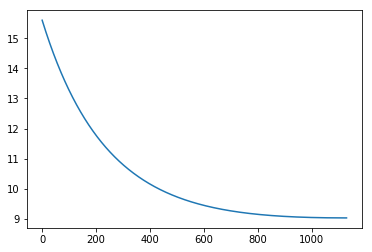

In [11]:
plt.plot(range(len(gr['costs'])), gr['costs'])
plt.show()

## 6. Modell plotten

Plotten Sie das Modell (Fit-Gerade) zusammen mit den Daten.

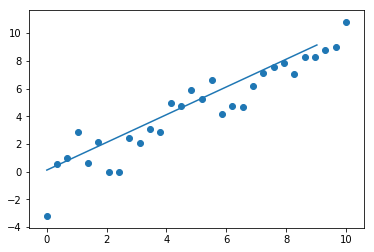

In [12]:
fit_x = gr['theta1']*x
fit_y = fit_x+gr['theta0']
#y = mx + c

plt.plot(fit_x, fit_y)
plt.scatter(x,y)
plt.show()

## 7. Trainieren und plotten
Trainieren (siehe 5b) für verschiedene Werte der Lernrate und plotten Sie Kosten über den Iterationen in einen Graph.

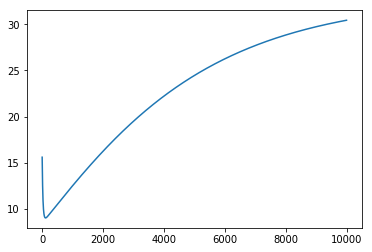

In [13]:
gr1 = gradient_descent(x,y,alpha=0.001)
plt.plot(range(len(gr1['costs'])), gr1['costs'])
plt.show()


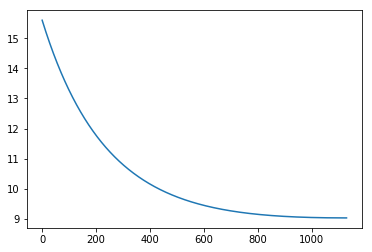

In [14]:
gr1 = gradient_descent(x,y,alpha=0.0001)
plt.plot(range(len(gr1['costs'])), gr1['costs'])
plt.show()


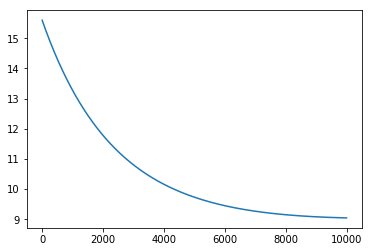

In [15]:
gr1 = gradient_descent(x,y,alpha=0.00001)
plt.plot(range(len(gr1['costs'])), gr1['costs'])
plt.show()


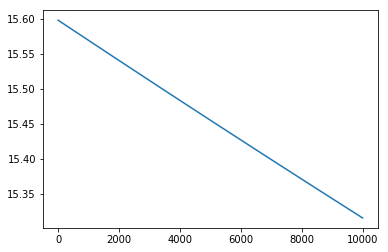

In [16]:
gr1 = gradient_descent(x,y,alpha=0.0000001)
plt.plot(range(len(gr1['costs'])), gr1['costs'])
plt.show()


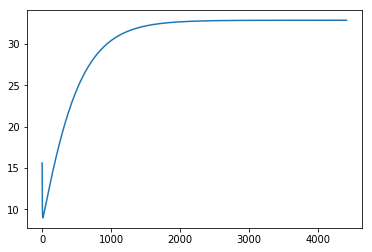

In [17]:
gr1 = gradient_descent(x,y,alpha=0.01)
plt.plot(range(len(gr1['costs'])), gr1['costs'])
plt.show()
